[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/road-glare-removal-tests/blob/master/tests1.ipynb)

In [2]:
# def upload_files():
#   from google.colab import files
#   uploaded = files.upload()
#   for k, v in uploaded.items():
#     open(k, 'wb').write(v)
#   return list(uploaded.keys())

# upload_files()


!mkdir overExposed
!mkdir underExposed

!wget https://cdn-images-1.medium.com/max/1200/1*g5N5VKp-Jz3n41m-gmMdUg.jpeg
!mv "1*g5N5VKp-Jz3n41m-gmMdUg.jpeg" "overExposed/overexpImage1.jpg"
!wget https://image.freepik.com/fotos-gratis/conducao-atraves-de-uma-estrada-molhada_442-19322940.jpg
!mv "conducao-atraves-de-uma-estrada-molhada_442-19322940.jpg" "overExposed/overexpImage2.jpg"
!wget https://i0.wp.com/www.paintingwithwatercolors.com/wp-content/uploads/2014/02/Wet-day-in-Bathurst-with-Church.jpg
!mv "Wet-day-in-Bathurst-with-Church.jpg" "overExposed/overexpImage3.jpg"

!wget http://www.capecentralhigh.com/wp-content/uploads/2013/02/Southbound-Kingshighway-south-of-Broadway-02-18-2013_2317.jpg
!mv "Southbound-Kingshighway-south-of-Broadway-02-18-2013_2317.jpg" "underExposed/underexpImage1.jpg"
!wget http://postachio-images.s3-website-us-east-1.amazonaws.com/1ad8a66577cc75f228b2839036ab3d6b/98f7f2a8715b31c98cb3fb7f08eea44a/w600_77971a62ebfe9a28cf5439c3607b631f.jpg
!mv "w600_77971a62ebfe9a28cf5439c3607b631f.jpg" "underExposed/underexpImage2.jpg"
!wget http://www.capecentralhigh.com/wp-content/uploads/2013/02/Good-Hope-02-18-2013_2337.jpg
!mv "Good-Hope-02-18-2013_2337.jpg" "underExposed/underexpImage3.jpg"

--2018-07-27 05:16:19--  https://cdn-images-1.medium.com/max/1200/1*g5N5VKp-Jz3n41m-gmMdUg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 104.16.120.145, 104.16.118.145, 104.16.119.145, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|104.16.120.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143020 (140K) [image/jpeg]
Saving to: ‘1*g5N5VKp-Jz3n41m-gmMdUg.jpeg’

1*g5N5VKp-Jz3n41m-g 100%[===================>] 139.67K  --.-KB/s    in 0.07s   

2018-07-27 05:16:20 (1.84 MB/s) - ‘1*g5N5VKp-Jz3n41m-gmMdUg.jpeg’ saved [143020/143020]

--2018-07-27 05:16:22--  https://image.freepik.com/fotos-gratis/conducao-atraves-de-uma-estrada-molhada_442-19322940.jpg
Resolving image.freepik.com (image.freepik.com)... 23.209.179.118, 2600:1409:5000:18f::30ec, 2600:1409:5000:181::30ec
Connecting to image.freepik.com (image.freepik.com)|23.209.179.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83041 (81K) [im

In [3]:
# !mv "overexpImage1.jpg" "overExposed/overexpImage1.jpg"
# !mv "overexpImage4.jpg" "overExposed/overexpImage4.jpg"
# cd overExposed

!ls -lrt

total 12
drwxr-xr-x 3 root root 4096 Jul 25 16:59 datalab
drwxr-xr-x 2 root root 4096 Jul 27 05:16 overExposed
drwxr-xr-x 2 root root 4096 Jul 27 05:16 underExposed


In [0]:
import matplotlib.pyplot as plt
# !pip install opencv-python
import cv2 
import glob

In [0]:
def loadImages(path):
  return plt.imread(path)
# plt.imshow(image)
# import glob
# imagePaths = [f for f in glob.glob('*.jpg')]
# imagePaths

In [0]:
def getLuminosity(image):
  return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,0]
# plt.imshow(image_YUV)

In [0]:
def getImagesFromFolder(foldername):
  imagePaths = [image_path for image_path in glob.glob(foldername+'/*.jpg')]
  images= [loadImages(image_path) for image_path in imagePaths]
  return images


In [0]:
def getMedianOfImage(single_d):
  single_d_sorted=sorted(single_d)
  median_luminance_value= single_d_sorted[len(single_d)//2]
  return median_luminance_value

def getMeanOfImage(single_d):
  mean_luminance_value= sum(single_d)/len(single_d)
  return mean_luminance_value

In [10]:

overExposedImages= getImagesFromFolder("overExposed")
underExposedImages= getImagesFromFolder("underExposed")

print(len(overExposedImages))
print(len(underExposedImages))

overExposedMedianValues=[]
overExposedmeanValues=[]
overExposedPixelValues=[]
overExposedImages_YUV=[]

underExposedMedianValues=[]
underExposedmeanValues=[]
underExposedPixelValues=[]
underExposedImages_YUV=[]

for image in overExposedImages:
  try:
    image_YUV= getLuminosity(image)
    overExposedImages_YUV.append(image_YUV)
    single_d= image_YUV.ravel()
    overExposedPixelValues.append(single_d)
    overExposedMedianValues.append(getMedianOfImage(single_d))
    overExposedmeanValues.append(getMeanOfImage(single_d))
  except:
    pass

for image in underExposedImages:
  try:
    image_YUV= getLuminosity(image)
    underExposedImages_YUV.append(image_YUV)
    single_d= image_YUV.ravel()
    underExposedPixelValues.append(single_d)
    underExposedMedianValues.append(getMedianOfImage(single_d))
    underExposedmeanValues.append(getMeanOfImage(single_d))
  except:
    pass

3
3


In [11]:
print('Over exposed Stats:')
print('====================')
print('')
print("%-20s %-10s %-20s"  % ("Median","|","Mean"))
for i in range(len(overExposedMedianValues)):
  print("%-20s %-10s %-20s"  % (overExposedMedianValues[i],"|",overExposedmeanValues[i]))

print('')
print('Under exposed Stats:')
print('====================')
print('')
print("%-20s %-10s %-20s"  % ("Median","|","Mean"))
for i in range(len(underExposedMedianValues)):
  print("%-20s %-10s %-20s"  % (underExposedMedianValues[i],"|",underExposedmeanValues[i]))


Over exposed Stats:

Median               |          Mean                
99                   |          128.58716221910652  
132                  |          131.46668143656717  
16                   |          47.60521979166667   

Under exposed Stats:

Median               |          Mean                
11                   |          22.46053452966607   
15                   |          27.17905017921147   
7                    |          21.676168170442573  


Skewness: is a measure of (lack of) symmetry. For instance, if the skewness is negative, the histogram is negatively skewed. That means its left tail is longer or fatter than its right one (wiki:skewness). Therefore, the frequency over the darker intensities (closer to zero) is wider spread (less concentrated, but not necessarily less frequent than the right tail!). The positive skewness is the opposite.

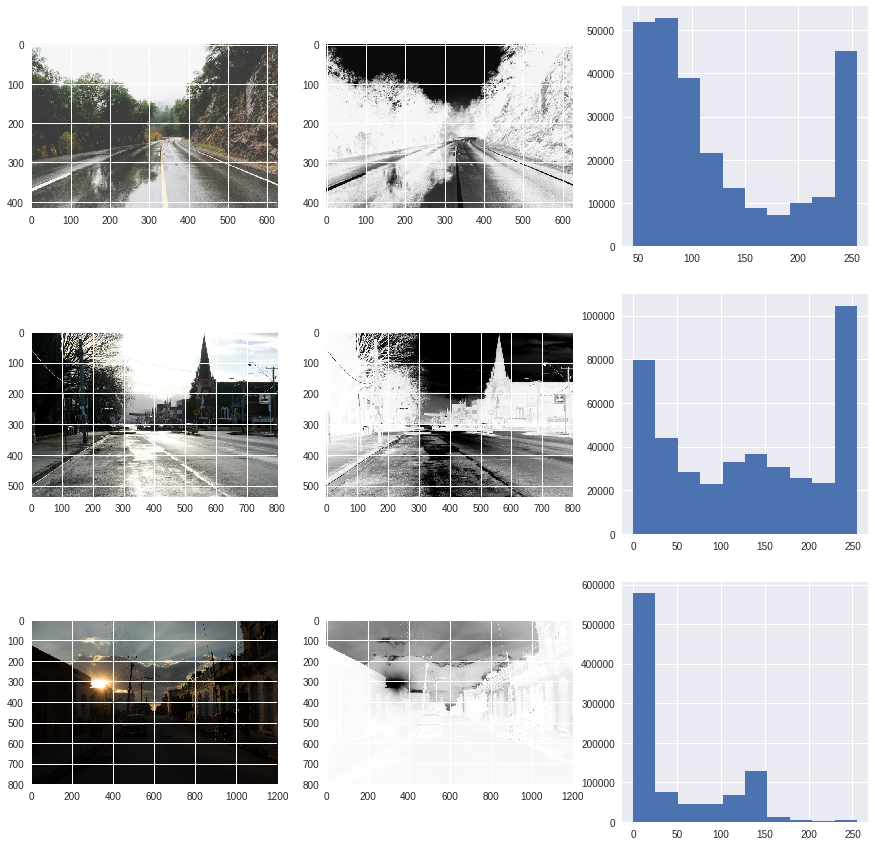

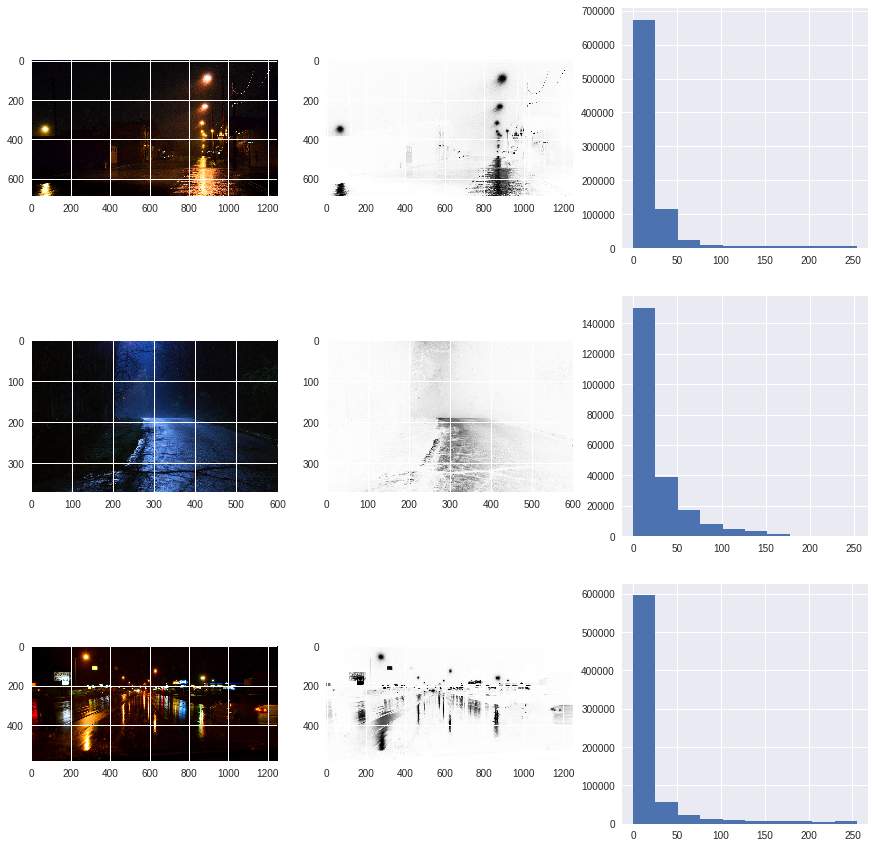

In [12]:
columns=3
fig, axs = plt.subplots(len(overExposedImages), columns, figsize=(15, 15))
for i in range(len(overExposedImages)):
  try:
    axs[i, 0].imshow(overExposedImages[i])
    axs[i, 1].imshow(overExposedImages_YUV[i])
    axs[i, 2].hist(overExposedPixelValues[i])
  except:
    pass
plt.show()

fig1, axs1 = plt.subplots(len(underExposedImages), columns, figsize=(15, 15))
for i in range(len(underExposedImages)):
  try:
    axs1[i, 0].imshow(underExposedImages[i])
    axs1[i, 1].imshow(underExposedImages_YUV[i])
    axs1[i, 2].hist(underExposedPixelValues[i])
  except:
    pass
plt.show()
#   fig.add_subplot(len(overExposedImages), columns, 2)
#   plt.imshow(overExposedImages[i])




Contrast changes

In [0]:
from PIL import Image

def change_contrast(image, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return image.point(contrast)




In [0]:
import numpy as np
def contrast_variants(image_path):
  image_ar=[]
  result_set=[]
  img= Image.open(image_path)
  for i in range(-70, 70, 20):
    image= change_contrast(img, i)
    image_ar.append(image)

  fig2, axs2 = plt.subplots(len(image_ar),2, figsize=(15, 15))
  fig2.subplots_adjust(hspace=0.5)
  for i in range(len(image_ar)):
  #   try:

      res=[]
      np_image= np.copy(image_ar[i])
      res.append(np_image) #0
      height= np_image.shape[0]
      width= np_image.shape[1]
      np_image= np_image[:,:,:]
       
      axs2[i,0].imshow(np_image)
      
      Y_image= getLuminosity(np_image)
      res.append(Y_image) #1
      single_d= Y_image.ravel()
      res.append(single_d) #2
  #     print(single_d)
      result = axs2[i,1].hist(single_d)
      mean=single_d.mean() 
      res.append(mean) #3
      median= sorted(single_d)[len(single_d)//2]
      res.append(median) #4
      axs2[i,1].axvline(mean, color='k', linestyle='dashed', linewidth=1)
      axs2[i,1].axvline(median, color='g', linestyle='dashed', linewidth=1)
      axs2[i,1].set_title("median: {0:.3f}, mean: {1:.3f}".format(median,mean))
      result_set.append(res)
      
  #   except:
  #     pass

  plt.show()
  return result_set


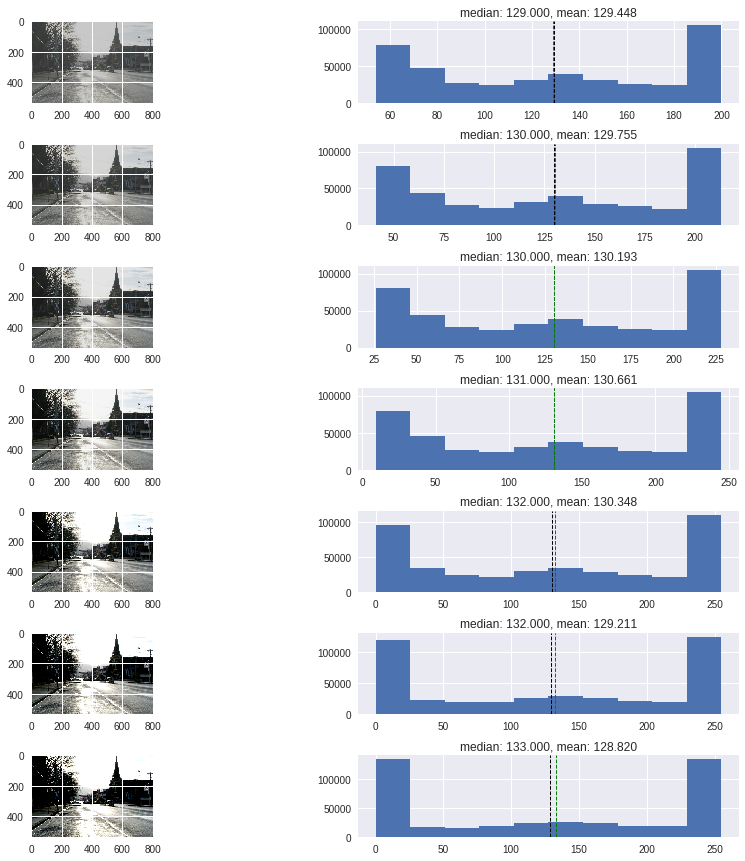

In [31]:
res_over= contrast_variants('overExposed/overexpImage3.jpg')

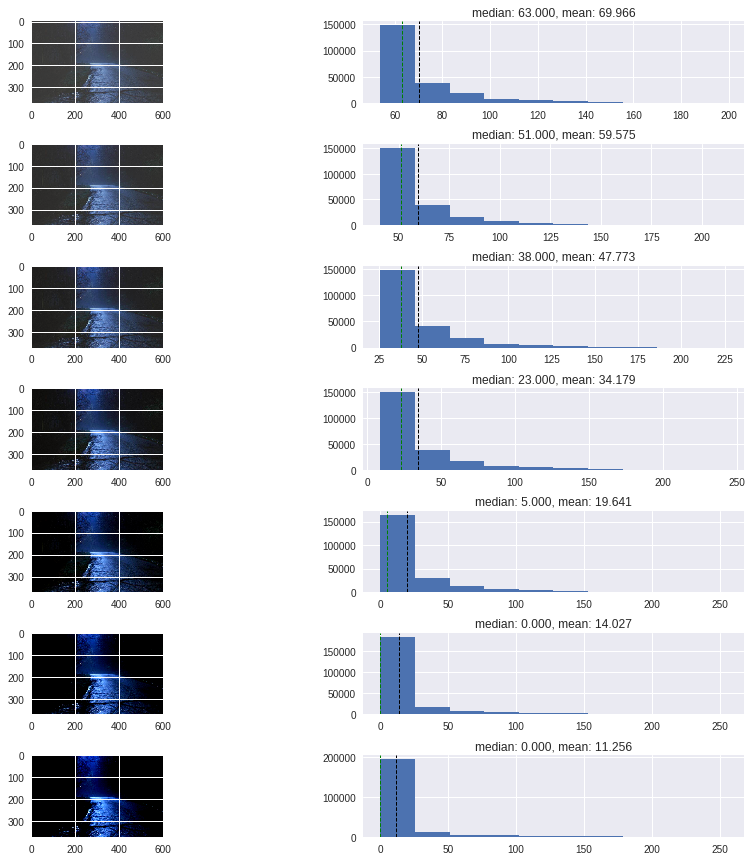

In [25]:
res_under=contrast_variants('underExposed/underexpImage2.jpg')

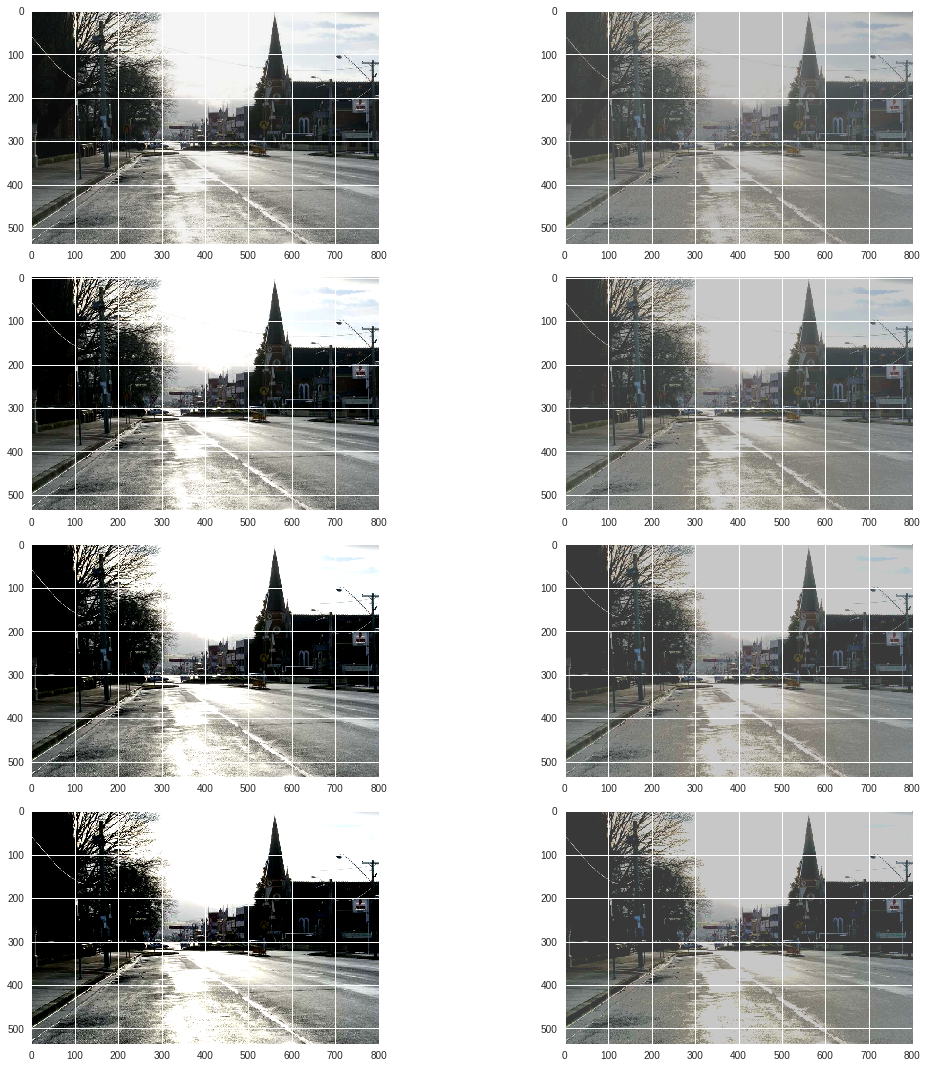

In [32]:
import math
fig3, axs3 = plt.subplots(len(res_over[3:7]),2, figsize=(15, 15))
fig3.tight_layout()
ind=0

for s in res_over[3:7]:
  image=s[0]
  Y_image= s[1]
  median= s[3]

  height= Y_image.shape[0]
  width= Y_image.shape[1] 
  coeff=5
  for i in range(height):
    for j in range(width):
      pixel_value=Y_image[i:i+1,j:j+1]
      if pixel_value>median:
        Y_image[i:i+1,j:j+1]= min(pixel_value-int(math.sqrt(pixel_value-median)*coeff),255)
      else:
        Y_image[i:i+1,j:j+1]= max(pixel_value+int(math.sqrt(median-pixel_value)*coeff),0)
  axs3[ind,0].imshow(image)      
  image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
  image[:,:,0]=Y_image
  image= cv2.cvtColor(image, cv2.COLOR_YUV2RGB)
  axs3[ind,1].imshow(image)
  ind+=1
plt.show()
  

In [0]:
def hls(image,src='RGB'):
    verify_image(image)
    if(is_list(image)):
        image_HLS=[]
        image_list=image
        for img in image_list:
            eval('image_HLS.append(cv2.cvtColor(img,cv2.COLOR_'+src.upper()+'2HLS))')
    else:
        image_HLS = eval('cv2.cvtColor(image,cv2.COLOR_'+src.upper()+'2HLS)')
    return image_HLS

def hue(image,src='RGB'):
    verify_image(image)
    if(is_list(image)):
        image_Hue=[]
        image_list=image
        for img in image_list:
            image_Hue.append(hls(img,src)[:,:,0])
    else:
        image_Hue= hls(image,src)[:,:,0]
    return image_Hue

def lightness(image,src='RGB'):
    verify_image(image)
    if(is_list(image)):
        image_lightness=[]
        image_list=image
        for img in image_list:
            image_lightness.append(hls(img,src)[:,:,1])
    else:
        image_lightness= hls(image,src)[:,:,1]
    return image_lightness

def saturation(image,src='RGB'):
    verify_image(image)
    if(is_list(image)):
        image_saturation=[]
        image_list=image
        for img in image_list:
            image_saturation.append(hls(img,src)[:,:,2])
    else:
        image_saturation= hls(image,src)[:,:,2]
    return image_saturation

###################### HSV #############################

def hsv(image,src='RGB'):
    verify_image(image)
    if(is_list(image)):
        image_HSV=[]
        image_list=image
        for img in image_list:
            eval('image_HSV.append(cv2.cvtColor(img,cv2.COLOR_'+src.upper()+'2HSV))')
    else:
        image_HSV = eval('cv2.cvtColor(image,cv2.COLOR_'+src.upper()+'2HSV)')
    return image_HSV

def value(image,src='RGB'):
    verify_image(image)
    if(is_list(image)):
        image_value=[]
        image_list=image
        for img in image_list:
            image_value.append(hsv(img,src)[:,:,2])
    else:
        image_value= hsv(image,src)[:,:,2]
    return image_value

###################### BGR #############################

def bgr(image, src='RGB'):
    verify_image(image)
    if(is_list(image)):
        image_BGR=[]
        image_list=image
        for img in image_list:
            eval('image_BGR.append(cv2.cvtColor(img,cv2.COLOR_'+src.upper()+'2BGR))')
    else:
        image_BGR= eval('cv2.cvtColor(image,cv2.COLOR_'+src.upper()+'2BGR)')
    return image_BGR

###################### RGB #############################
def rgb(image, src='BGR'):
    verify_image(image)
    if(is_list(image)):
        image_RGB=[]
        image_list=image
        for img in image_list:
            eval('image_RGB.append(cv2.cvtColor(img,cv2.COLOR_'+src.upper()+'2RGB))')
    else:
        image_RGB= eval('cv2.cvtColor(image,cv2.COLOR_'+src.upper()+'2RGB)')
    return image_RGB

def red(image,src='BGR'):
    verify_image(image)
    if(is_list(image)):
        image_red=[]
        image_list=image
        for img in image_list:
            i= eval('cv2.cvtColor(img,cv2.COLOR_'+src.upper()+'2RGB)')
            image_red.append(i[:,:,0])
    else:
        image_red= eval('cv2.cvtColor(image,cv2.COLOR_'+src.upper()+'2RGB)[:,:,0]')
    return image_red

def green(image,src='BGR'):
    verify_image(image)
    if(is_list(image)):
        image_green=[]
        image_list=image
        for img in image_list:
            i= eval('cv2.cvtColor(img,cv2.COLOR_'+src.upper()+'2RGB)')
            image_green.append(i[:,:,1])
    else:
        image_green= eval('cv2.cvtColor(image,cv2.COLOR_'+src.upper()+'2RGB)[:,:,1]')
    return image_green

def blue(image,src='BGR'):
    verify_image(image)
    if(is_list(image)):
        image_blue=[]
        image_list=image
        for img in image_list:
            i=eval('cv2.cvtColor(img,cv2.COLOR_'+src.upper()+'2RGB)')
            image_blue.append(i[:,:,2])
    else:
        image_blue= eval('cv2.cvtColor(image,cv2.COLOR_'+src.upper()+'2RGB)[:,:,2]')
    return image_blue

err_not_np_img= "not a numpy array or list of numpy array" 
err_img_arr_empty="Image array is empty"
err_row_zero="No. of rows can't be <=0"
err_column_zero="No. of columns can't be <=0"
err_invalid_size="Not a valid size tuple (x,y)"
err_caption_array_count="Caption array length doesn't matches the image array length"

def is_numpy_array(x):

    return isinstance(x, np.ndarray)
def is_tuple(x):
    return type(x) is tuple
def is_list(x):
    return type(x) is list
def is_numeric(x):
    return type(x) is int
def is_numeric_list_or_tuple(x):
    for i in x:
        if not is_numeric(i):
            return False
    return True

err_brightness_coeff="brightness coeff can only be between 0.0 to 1.0" 
err_darkness_coeff="darkness coeff can only be between 0.0 to 1.0" 

def change_light(image, coeff):
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS
    image_HLS = np.array(image_HLS, dtype = np.float64) 
    image_HLS[:,:,1] = image_HLS[:,:,1]*coeff ## scale pixel values up or down for channel 1(Lightness)
    if(coeff>1):
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255
    else:
        image_HLS[:,:,1][image_HLS[:,:,1]<0]=0
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB
    return image_RGB 

In [0]:


def compensate_exposure(img):
  
  
  
  image=np.copy(img)
  YUV_image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
  single_d= YUV_image.ravel()
  median= getMedianOfImage(single_d)
  mean= getMeanOfImage(single_d)
  
  exposure_dir=mean-80
  contrast_corrected_image= change_contrast(img, exposure_dir)
  contrast_corrected_image=np.copy(contrast_corrected_image)
  
#   b_coeff=0
#   if exposure_dir>0:
#     b_coeff= exposure_dir/(255-80)
#     print(b_coeff)
#   else:
#     b_coeff= 1+ mean/80
#   contrast_corrected_image= change_light(contrast_corrected_image,b_coeff)
  #contrast_corrected_image=cv2.fastNlMeansDenoisingColored(contrast_corrected_image,None,3,3,7,21)
  YUV_image_c= cv2.cvtColor(contrast_corrected_image, cv2.COLOR_RGB2YUV)
  single_d_c= YUV_image_c.ravel()
  median_c= getMedianOfImage(single_d_c)
  mean_c= getMeanOfImage(single_d_c)
  
  
  height= YUV_image.shape[0]
  width= YUV_image.shape[1] 
  coeff=5
  for i in range(height):
    for j in range(width):
      pixel_value=YUV_image[i:i+1,j:j+1,0]
      if pixel_value>median:
        YUV_image_c[i:i+1,j:j+1,0]= min(pixel_value-int(math.sqrt(pixel_value-median)*coeff),255)
      else:
        YUV_image_c[i:i+1,j:j+1,0]= max(pixel_value+int(math.sqrt(median-pixel_value)*coeff),0)

  rgb_img= cv2.cvtColor(YUV_image_c, cv2.COLOR_YUV2RGB)
  return rgb_img #cv2.fastNlMeansDenoisingColored(rgb_img,None,2,2,7,21)

plt.show()

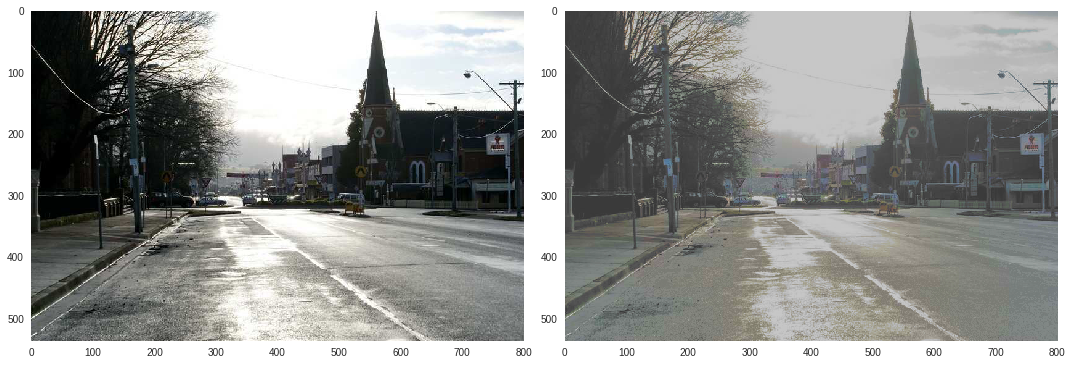

In [103]:
fig, axs = plt.subplots(1,2, figsize=(15, 15))
fig.tight_layout()
image_path='overExposed/overexpImage3.jpg'
image_test= Image.open(image_path)
image_result= compensate_exposure(image_test)
axs[0].imshow(image_test)      
axs[1].imshow(image_result)
axs[0].grid(False)
axs[1].grid(False)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


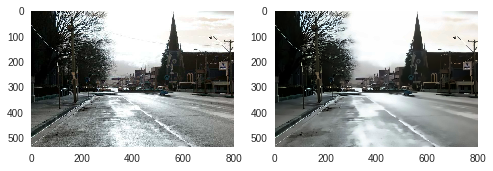

In [49]:
img = cv2.imread('overExposed/overexpImage3.jpg')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.subplot(121).grid(False)
plt.subplot(122).grid(False)